# ANU ASTR4004 2025 - Week 4 (12+14 August 2025): Basic Statistics


Author: Dr Sven Buder (sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-distribution" data-toc-modified-id="Gaussian-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gaussian distribution</a></span></li><li><span><a href="#Uncertainty" data-toc-modified-id="Uncertainty-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uncertainty</a></span></li><li><span><a href="#Significance" data-toc-modified-id="Significance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Significance</a></span></li><li><span><a href="#Significant-Decimal-Places" data-toc-modified-id="Significant-Decimal-Places-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Significant Decimal Places</a></span></li><li><span><a href="#Automatically-reporting-tables-&amp;-latex" data-toc-modified-id="Automatically-reporting-tables-&amp;-latex-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Automatically reporting tables &amp; latex</a></span></li><li><span><a href="#Uncertainties-in-practice" data-toc-modified-id="Uncertainties-in-practice-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Uncertainties in practice</a></span></li></ul></div>

In [36]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Gaussian distribution

We will now estimate the parameters of a Gaussian / Normal distribution. Recall that for a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$ (or variance $\sigma^2$), the Probability Distribution Function (PDF) can be written as

$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

The negative logarithmic likelihood can be written as,

$$ - \log L = - \sum^{N}_{i=0} ( \frac{1}{\sqrt{2\pi}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} ) $$


`scipy` actually has a package `stats.norm` for the Normal distributions that we can use to both sample and plot:

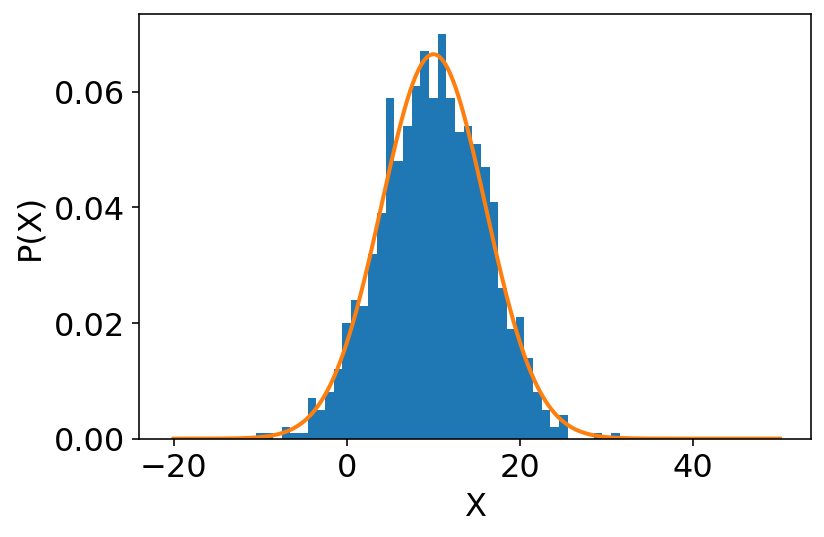

In [37]:
from scipy.stats import norm

# draw the sample
mu = 10
sigma = 6
x = norm.rvs(mu,sigma,1000)

bin_edges = np.arange(-20, 40) - 0.5
plt.hist(x, bins=bin_edges, density=True) # density=True to normalize the histogram

# evaluate the ground truth Gaussian
x_plot = np.linspace(-20,50,1000)
y = norm.pdf(x_plot,loc=mu,scale=sigma)
plt.plot(x_plot,y)

plt.xlabel('X')
plt.ylabel('P(X)')

plt.tight_layout()
plt.show()

True mu = 10 , sig = 6
Fit: mu = 10.04 ± 0.17
Fit: sigma = 5.98 ± 0.13


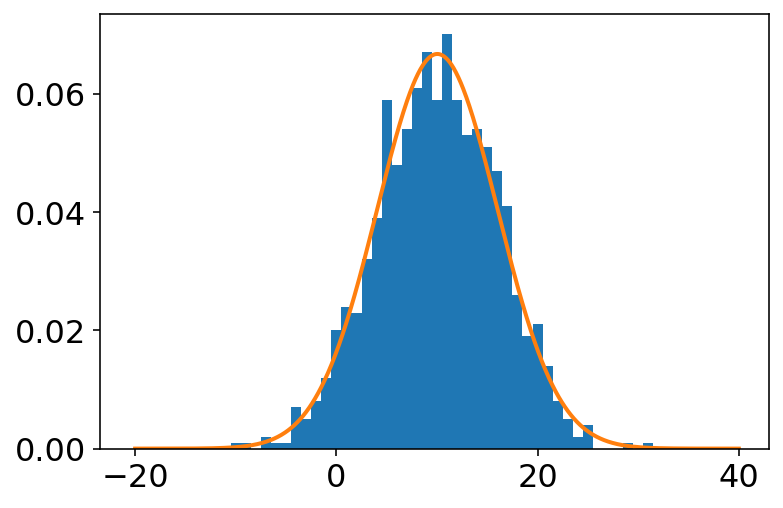

In [38]:
from scipy.optimize import minimize

def negative_log_likelihood(p, x):
    mu,sigma= p
    return - np.sum(np.log(norm.pdf(x,loc=mu,scale=sigma)))

result = minimize(
    negative_log_likelihood,
    x0=(mu,sigma, ),   
    args=(x, ), 
    # bounds = [
    #   (None, None),
    #   (0.0, np.inf)
    # ],
)

# density=True to normalize the histogram
bin_edges = np.arange(-20, 40) - 0.5
plt.hist(x, bins=bin_edges, density=True) 

# show the the best fitted results
xx = np.linspace(-20, 40, 1000)
plt.plot(xx, norm.pdf(xx,loc=result.x[0],scale=result.x[1]))

print('True mu = '+'{} , sig = {}'.format(mu,sigma))
print('Fit: mu = {:.2f} ± {:.2f}'.format(result.x[0], np.sqrt(result.hess_inv[0, 0])))
print('Fit: sigma = {:.2f} ± {:.2f}'.format(result.x[1], np.sqrt(result.hess_inv[1, 1])))

## Uncertainty

Suppose that we wish to find the area of a circle of radius $r_c$ but have forgotten the equation. We might inscribe the circle within a square of known area $A_s$ and cover the surface of the square uniformly with small marks, say grains of rice.

We find the ratio of the number of grains that lie within the circle to those that cover the square, and determine the area of the circle $A_c$ from the relation

$$ A_C = A_S N_c / N_s $$

where $N_c$ and $N_s$ are the numbers of grains of rice within the boundaries of the circle and of the square, respectively.

Let's use Monte Carlo Sampling to estimate the radius by randomly sampling $N$ pairs $(x,y)$:

$R_c$ = radius of a circle  
$A_c$ circle area within a square  
$A_s$ square  
$N_c$ = in circle  
$N_s$ = outside, but in square.

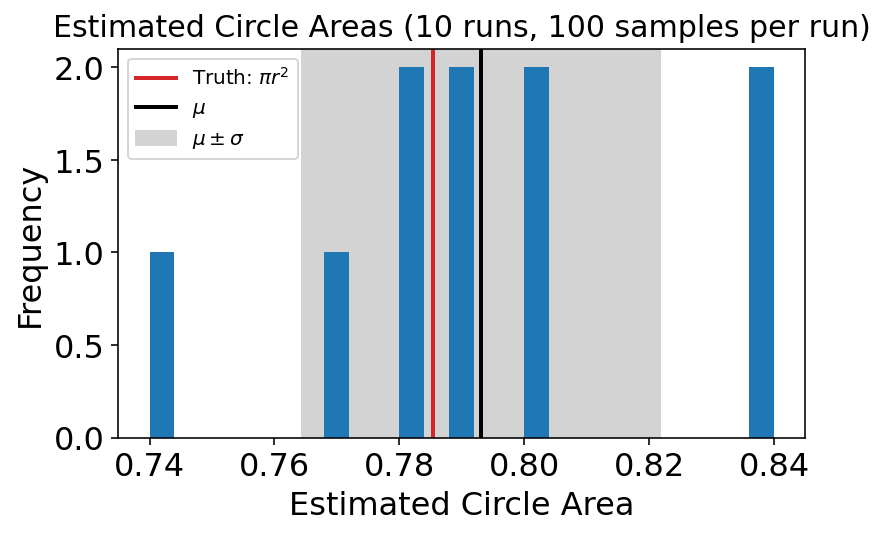

N: 100, num_runs: 10, Mean: 0.79, Sigma: 0.03, Percentage within 1 sigma: 70.0%


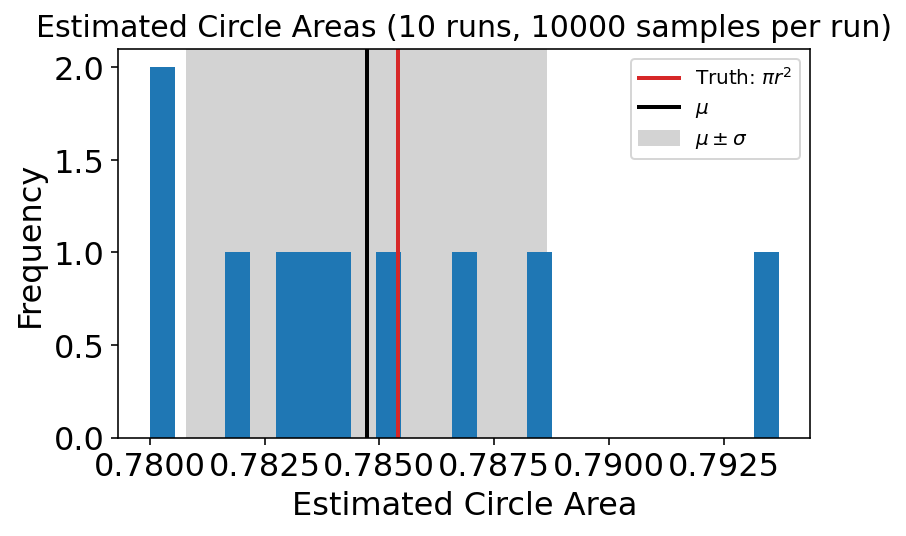

N: 10000, num_runs: 10, Mean: 0.78, Sigma: 0.00, Percentage within 1 sigma: 60.0%


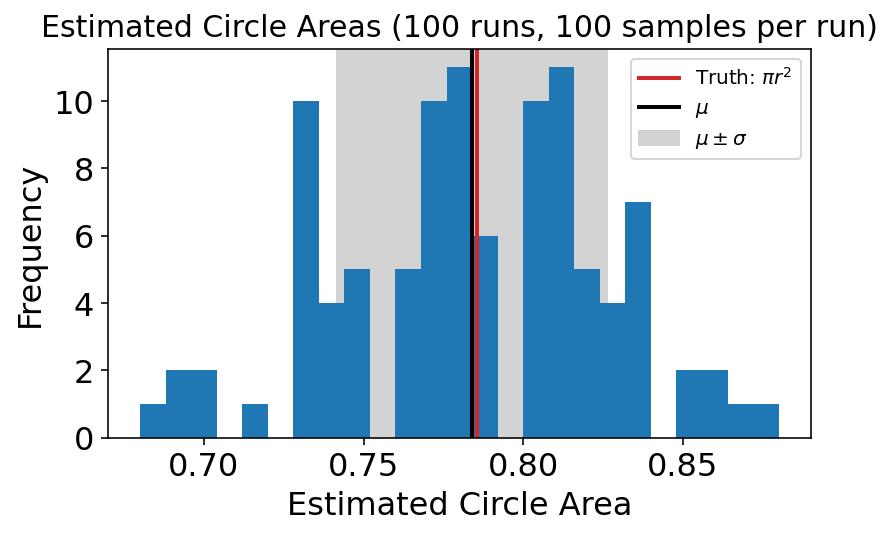

N: 100, num_runs: 100, Mean: 0.78, Sigma: 0.04, Percentage within 1 sigma: 63.0%


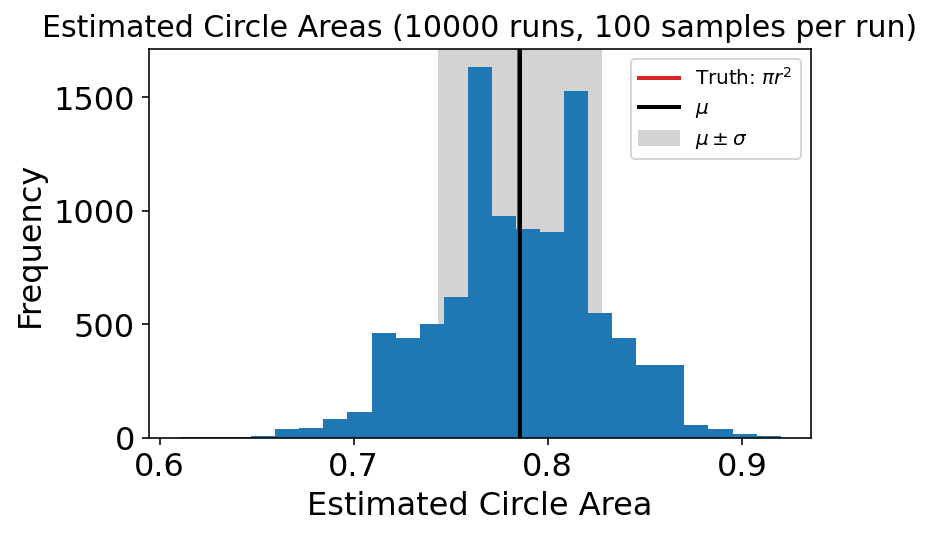

N: 100, num_runs: 10000, Mean: 0.79, Sigma: 0.04, Percentage within 1 sigma: 65.8%


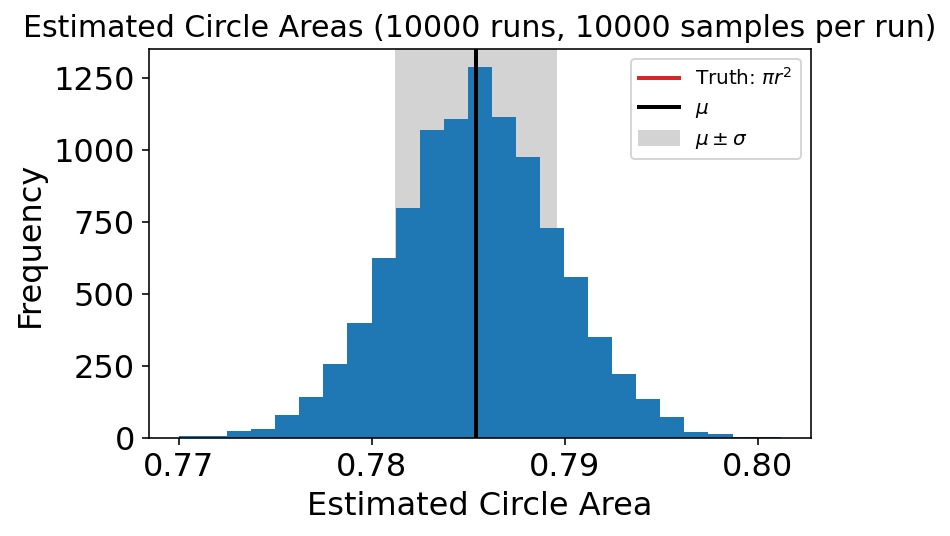

N: 10000, num_runs: 10000, Mean: 0.79, Sigma: 0.00, Percentage within 1 sigma: 68.6%


In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(83)

# Re-define the function with the correct import statement
def monte_carlo_circle_area_single_run(N, square_side_length):
    # Radius of the circle
    radius = square_side_length / 2
    
    # Randomly generate N points within the square
    x = np.random.uniform(-radius, radius, N)
    y = np.random.uniform(-radius, radius, N)
    
    # Check how many points fall inside the circle (x**2 + y**2 <= r**2)
    inside_circle = (x**2 + y**2) <= radius**2
    points_inside_circle = np.sum(inside_circle)
    
    # Calculate the fraction of points inside the circle
    fraction_inside_circle = points_inside_circle / N
    
    # Estimate the area of the circle based on the fraction
    square_area = square_side_length ** 2
    estimated_circle_area = fraction_inside_circle * square_area
    
    return estimated_circle_area

def monte_carlo_sampling(N=100, square_side_length=1.0, num_runs=10, plot_histogram=True):
    """
    Monte Carlo sampling for estimating circle area.
    
    N = 100  # Number of random pairs per run
    square_side_length = 2.0  # Side length of the square
    num_runs = 5  # Number of independent Monte Carlo runs
    """

    # Perform *num_runs* independent Monte Carlo runs
    estimated_areas = [monte_carlo_circle_area_single_run(N, square_side_length) for _ in range(num_runs)]

    # Calculate the mean and standard deviation (sigma) of the estimated areas
    mean_estimated_area = np.mean(estimated_areas)
    sigma_estimated_area = np.std(estimated_areas)

    # Check how many values are within mu ± 1 sigma
    within_one_sigma = np.sum((estimated_areas >= (mean_estimated_area - sigma_estimated_area)) & 
                              (estimated_areas <= (mean_estimated_area + sigma_estimated_area)))
    percentage_within_one_sigma = (within_one_sigma / num_runs) * 100

    if plot_histogram:
        # Plot histogram of the estimated areas
        f, ax = plt.subplots(figsize=(6, 4))
        ax.hist(estimated_areas, bins=25)
        ax.axvline(np.pi * (square_side_length / 2) ** 2, color='C3', label=r'Truth: $\pi r^2$')
        ax.axvline(mean_estimated_area, color='k', label=r'$\mu$')
        ax.axvspan(mean_estimated_area - sigma_estimated_area, mean_estimated_area + sigma_estimated_area,
                   zorder=0, color='lightgrey', label=r'$\mu \pm \sigma$')
        ax.legend(fontsize=10)
        ax.set_title('Estimated Circle Areas (' + str(num_runs) + ' runs, ' + str(N) + ' samples per run)', fontsize=15)
        ax.set_xlabel('Estimated Circle Area')
        ax.set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        
    print(f"N: {N}, num_runs: {num_runs}, Mean: {mean_estimated_area:.2f}, Sigma: {sigma_estimated_area:.2f}, Percentage within 1 sigma: {percentage_within_one_sigma:.1f}%")

monte_carlo_sampling()
monte_carlo_sampling(N = 10000)
monte_carlo_sampling(num_runs = 100)
monte_carlo_sampling(num_runs = 10000)
monte_carlo_sampling(N = 10000, num_runs = 10000)

## Significance

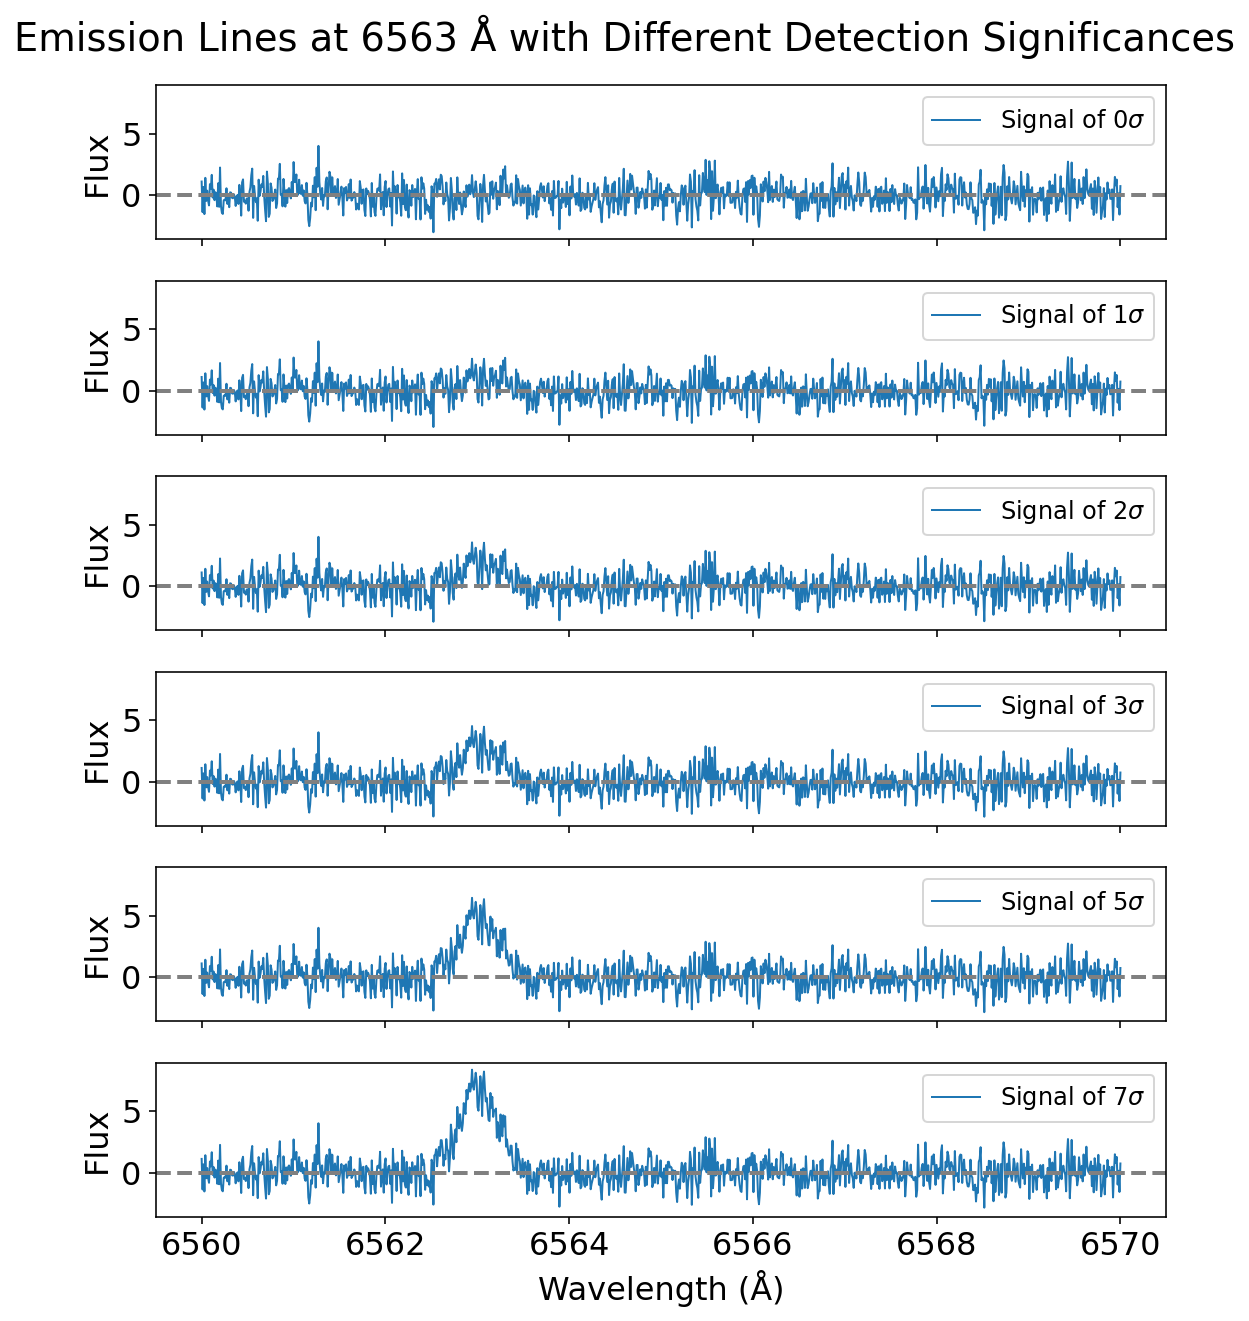

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
wavelengths = np.linspace(6560, 6570, 1000)  # Wavelength range around 6563 Angstrom
center = 6563  # Central wavelength of emission lines in Angstroms
sigma_noise = 1  # Standard deviation of noise

# Emission line properties (different strengths corresponding to different sigma detections)
sigma_levels = [0, 1, 2, 3, 5, 7]  # Detection significances
line_width = 0.2  # Standard deviation (width) of the Gaussian emission lines

# Generate noisy baseline spectrum
noise = np.random.normal(0, sigma_noise, wavelengths.size)

# Generate emission lines at different sigma levels
spectrum = noise.copy()
for sigma in sigma_levels:
    amplitude = sigma * sigma_noise  # Height of the emission line
    line_profile = amplitude * np.exp(-0.5 * ((wavelengths - center) / line_width) ** 2)
    spectrum += line_profile

# Creating a multi-panel figure to show different detection significances separately

fig, axes = plt.subplots(len(sigma_levels), 1, figsize=(8, 10), sharex=True, sharey=True)

for i, sigma in enumerate(sigma_levels):
    # Create individual spectrum for each sigma level
    spectrum = noise.copy()
    amplitude = sigma * sigma_noise
    line_profile = amplitude * np.exp(-0.5 * ((wavelengths - center) / line_width) ** 2)
    spectrum += line_profile
    
    # Plot each spectrum in a separate panel
    axes[i].plot(wavelengths, spectrum, label=f"Signal of {sigma}$\sigma$", lw = 1)
    axes[i].axhline(0, color="gray", linestyle="--")
    axes[i].set_ylabel("Flux")
    axes[i].legend(fontsize=12, loc='upper right')

# Set common x-axis label
plt.xlabel("Wavelength (Å)")
plt.suptitle("Emission Lines at 6563 Å with Different Detection Significances", y=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Significant Decimal Places

To how many decimal places should we report errors here?

In [41]:
# Example usage for small uncertainties:
value1 = 1.23456789
uncertainty1 = 0.01234

# Example usage for intermediate uncertainties:
value2 = 12.3456789
uncertainty2 = 1.234

# Example usage for large uncertainties:
value3 = 123.456789
uncertainty3 = 12.34

In [42]:
def round_to_significant_digits(value, uncertainty, sig_figs=2):
    """
    Rounds the value and uncertainty to the same number of significant decimal places
    based on the uncertainty, allowing control of the significant digits. If the uncertainty 
    is larger than 10, rounds to the nearest integer.
    
    Parameters:
    value (float): The measurement value.
    uncertainty (float): The measurement uncertainty.
    sig_figs (int): The number of significant figures to round the uncertainty to.
                    Default is 2 (i.e., the second significant figure of the uncertainty).
    
    Returns:
    tuple: (rounded_value, rounded_uncertainty) with appropriate significant digits or integers.
    """
    if uncertainty == 0:
        return value, uncertainty
    
    # Check if the uncertainty is larger than 10, if so round to nearest integer
    if uncertainty >= 10:
        rounded_value = round(value)
        rounded_uncertainty = round(uncertainty)
    else:
        # Find the first non-zero digit of the uncertainty
        decimal_places = -int(np.floor(np.log10(abs(uncertainty)))) + (sig_figs - 1)
    
        # Round the value and uncertainty to the same number of decimal places
        rounded_value = round(value, decimal_places)
        rounded_uncertainty = round(uncertainty, decimal_places)
    
    return rounded_value, rounded_uncertainty

In [43]:
latex_values = dict()

# iterate over the 3 examples
for value_index, (value, uncertainty) in enumerate(zip([value1,value2,value3],[uncertainty1,uncertainty2,uncertainty3])):

    # Rounding with 2 significant figures
    rounded_value, rounded_uncertainty = round_to_significant_digits(value, uncertainty)
    
    latex_values['example_'+str(value_index+1)] = r'$'+str(rounded_value)+' \pm '+str(rounded_uncertainty)+'$'
    
    print(r'$'+str(rounded_value)+' \pm '+str(rounded_uncertainty)+'$')

latex_values

$1.235 \pm 0.012$
$12.3 \pm 1.2$
$123 \pm 12$


{'example_1': '$1.235 \\pm 0.012$',
 'example_2': '$12.3 \\pm 1.2$',
 'example_3': '$123 \\pm 12$'}

## Automatically reporting tables & latex

Results may change - avoid copying by hand!

In [44]:
for measurement_nr in ['1','2','3']:
    with open('latex_input/measurement_example_'+measurement_nr+'.tex', 'w') as f:
        f.write(latex_values['example_'+measurement_nr])

In [45]:
# File path to save the LaTeX file
file_path = 'latex_input/mnras_table.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{Example table with automatically populated values.}' + '\n')
    f.write(r'\label{tab:example}' + '\n')
    f.write(r'\begin{tabular}{lc}' + '\n')
    f.write(r'\hline' + '\n')
    f.write(r'Example & Value \\ \n')
    f.write(r'\hline \n')

    # Add the data rows
    for key, value in latex_values.items():
        f.write(f'{key} & {value} \\\\ \n')

    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')

## Uncertainties in practice

A lot of fitting procedures already come with default setups and assumptions.
If you for example use `scipy.optimize.curve_fit` to fit a function `y_model = function(x, parameters)`, without explicitely telling `curve_fit` about your uncertainties, i.e. calling `curve_fit(function, x, y)`, then it is by default assuming that all measurements of y have the same uncertainty of `sigma=1`.

You can convince yourself of this, by checking out the DocString of `curve_fit`. You can open that by clicking inside the `curve_fit()` parantheses and then press the `shift+tab` keys at the same time. Pressing the combination once will open the DocString preview. Twice will open a window to scroll down and read the documentation:

```
sigma : None or scalar or M-length sequence or MxM array, optional
    ...
    None (default) is equivalent of 1-D `sigma` filled with ones.
```

a = -1.02 ± 0.10
b =  5.01 ± 0.02
Error function: 1.1740088840921805


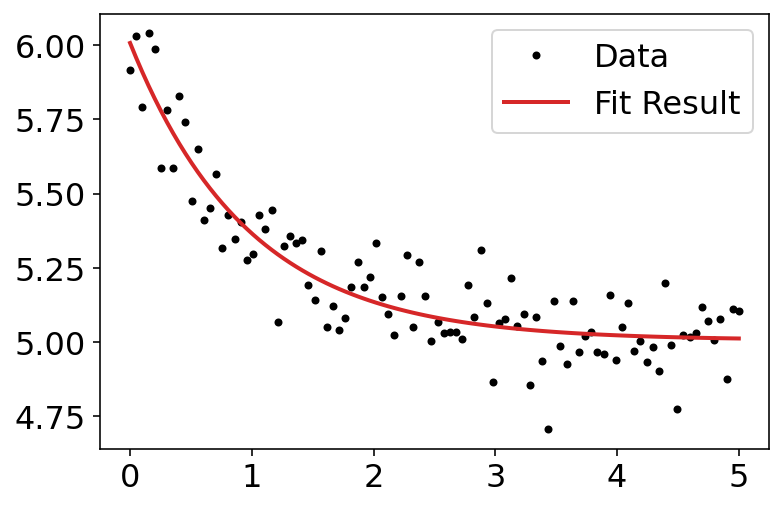

In [46]:
from scipy.optimize import curve_fit

# let make some mock data from an exponential function
a = -1
b = 5

def function(x, a, b):
    return np.exp(a * x) + b

x = np.linspace(0, 5, 100)
y = function(x, a, b) + np.random.normal(0, 0.1, 100) # add noise

params, covariance_matrix = curve_fit(function, x, y) # the param gives the best estimated parameters
# and the covariance matrix gives the full error matrix of the estimated parameters

uncertainties = np.sqrt(np.diag(covariance_matrix))
error = ((y - function(x, *params))**2).sum() # the total error between the best fitted model and the data

print('a = {:5.2f} ± {:.2f}'.format(params[0], uncertainties[0]))
print('b = {:5.2f} ± {:.2f}'.format(params[1], uncertainties[1]))
print('Error function: {}'.format(error))

plt.plot(x, y, '.', label='Data', c='k')
plt.plot(x, function(x, *params), label='Fit Result', c='C3')
plt.legend();

m = -0.96 ± 0.10
b =  4.87 ± 0.56


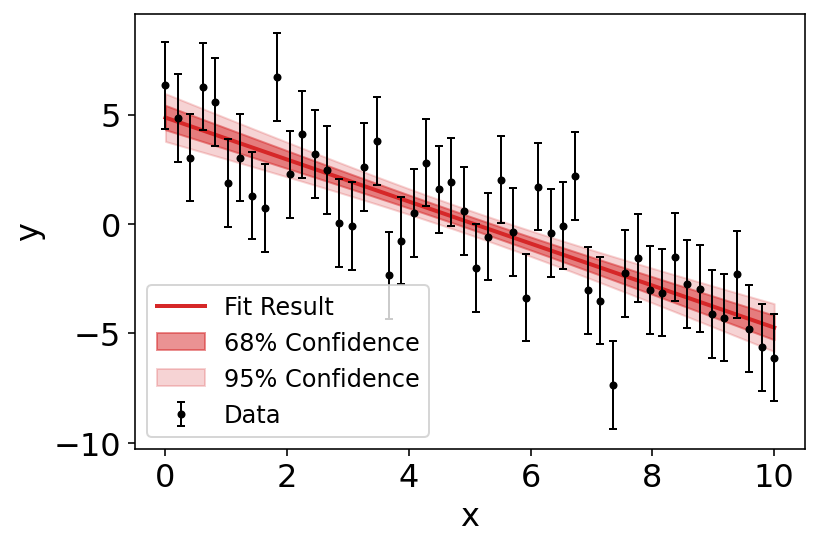

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import unumpy as unp
from uncertainties import correlated_values

# Generate mock data from an exponential function
m_true = -1
b_true = 5

def function(x, m, b):
    return m * x + b

np.random.seed(23)

# Generate some synthetic data from the model.
N = 50
x = np.linspace(0,10,N)
y_true = m_true * x + b_true

noise = 2
y_uncertainty = noise * np.ones(len(x))
y = y_true + np.random.normal(0, noise, size=len(x))

# Curve fitting
params, covariance_matrix = curve_fit(function, x, y, sigma=y_uncertainty, absolute_sigma=True)
uncertainties = np.sqrt(np.diag(covariance_matrix))

# Print fitted parameters and their uncertainties
print('m = {:5.2f} ± {:.2f}'.format(params[0], uncertainties[0]))
print('b = {:5.2f} ± {:.2f}'.format(params[1], uncertainties[1]))

# Get the correlated parameters with uncertainties
param_values = correlated_values(params, covariance_matrix)

# Generate the best-fit line
y_fit = function(x, *params)

# Propagate the uncertainties to the model
y_uncert = function(x, *param_values)
nominal_values = unp.nominal_values(y_uncert)
std_devs = unp.std_devs(y_uncert)

# Plot data
plt.errorbar(x, y, yerr = y_uncertainty, fmt = '.', label='Data', c='k', zorder=4, capsize=2, lw=1)
plt.plot(x, y_fit, label='Fit Result', c='C3', zorder=3)

# Plot uncertainty band (68% and 95% confidence interval)
plt.fill_between(x, nominal_values - std_devs, nominal_values + std_devs, 
                 color='C3', alpha=0.5, label='68% Confidence', zorder=2)
plt.fill_between(x, nominal_values - 1.96 * std_devs, nominal_values + 1.96 * std_devs, 
                 color='C3', alpha=0.2, label='95% Confidence', zorder=1)

plt.legend(fontsize=12,loc='lower left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()